In [61]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA

### Задание 0

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)   
Надо:   
1. Изобразить вектора на экране   
2. Изобразить точку x + y + z   
3. Найти угол между векторами x и y   

In [2]:
x = np.array([1, 1])

In [4]:
y = np.array([2, 0])

In [5]:
z = np.array([0, 2])

Изобразить вектора на экране:

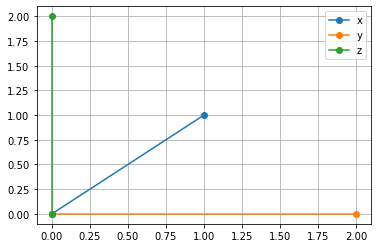

In [30]:
plt.plot([0, x[0]], [0, x[1]], '-o')
plt.plot([0, y[0]], [0, y[1]], '-o')
plt.plot([0, z[0]], [0, z[1]], '-o')
plt.legend(['x', 'y', 'z'])
plt.grid()

Изобразить точку x + y + z:

In [18]:
v = x + y + z

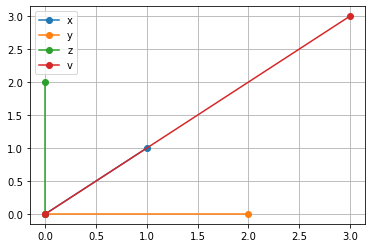

In [31]:
plt.plot([0, x[0]], [0, x[1]], '-o')
plt.plot([0, y[0]], [0, y[1]], '-o')
plt.plot([0, z[0]], [0, z[1]], '-o')
plt.plot([0, v[0]], [0, v[1]], '-o')
plt.legend(['x', 'y', 'z', 'v'])
plt.grid()

Найти угол между векторами x и y:

Скалярное произведение:

In [22]:
dot_product = np.dot(x, y)

Абсолютное значение:

In [23]:
module_x = np.linalg.norm(x)
module_y = np.linalg.norm(y)

In [24]:
cos_alpha = dot_product / (module_x * module_y)

In [42]:
alpha = round(np.arccos(cos_alpha) / np.pi * 180)

In [43]:
alpha

45.0

### Задание 1

Даны дома из Бостона   
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)   
Написать код разложения дома по указанному базису

Даны дома из Бостона:

In [47]:
from sklearn.datasets import load_boston
import pandas as pd

In [45]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [46]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [50]:
data.shape

(506, 14)

Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv):

Удаляем столбец стоимости:

In [51]:
data.drop('MEDV', axis = 1, inplace = True)

Посмотрим на пропущенные значения:

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Пропущенных значений нет. Следовательно, для включения в базис можно использовать любые векторы из набора данных

Так как у нас 13 признаков, то базис должен состоять из 13 векторов (линейно независимых)

Можно взять любые 13 домов. Возьмем первые 13. Проверим, что они линейно независимы.

In [73]:
basis = data.head(13)
basis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [70]:
basis_array = basis.values

In [71]:
basis_array_det = LA.det(basis_array)

In [72]:
basis_array_det

0.0

Определитель равен 0 из-за переменной CHAS. Возьмем другие 13 векторов, у которых CHAS не равен 0 и ZN не равен 0. 

In [83]:
basis = data[(data.ZN != 0) & (data.CHAS != 0)].head(13)
basis.shape

(7, 13)

Итак, мы нашли 7 векторов, удовлетворяющих нашим условиям. Добавим к ним еще 6 любых векторов.

In [86]:
basis = basis.append(data.head(6))

In [87]:
basis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
269,0.09065,20.0,6.96,1,0.4640,5.920,61.5,3.9175,3,223,18.6,391.34,13.65
273,0.22188,20.0,6.96,1,0.4640,7.691,51.8,4.3665,3,223,18.6,390.77,6.58
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
276,0.10469,40.0,6.41,1,0.4470,7.267,49.0,4.7872,4,254,17.6,389.25,6.05
277,0.06127,40.0,6.41,1,0.4470,6.826,27.6,4.8628,4,254,17.6,393.45,4.16
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [88]:
basis_array = basis.values

In [89]:
basis_array_det = LA.det(basis_array)

In [90]:
basis_array_det

-704319.8136228683

Ура, мы нашли базис! ;D

Написать код разложения дома по указанному базису:

Найдем обратную матрицу:

In [93]:
basis_array_inv = np.linalg.inv(basis_array)

In [98]:
x = data[data.index == 7].values

In [136]:
y = np.dot(basis_array_inv, x[0])

In [104]:
y

array([ 3.80426387e+04,  8.60361758e+02,  2.75385456e+03, -4.42896481e+04,
        4.39049999e+05, -1.52324000e+03, -1.35062375e+02, -2.39032462e+03,
        1.00161846e+04, -4.66470707e+02, -4.73501146e+02, -2.42533704e+02,
        3.75872064e+02])

Проверим:

In [105]:
check_x = np.dot(basis_array, y)

In [107]:
check_x

array([ 1.44550000e-01,  1.25000000e+01,  7.87000000e+00, -2.12523105e-11,
        5.24000000e-01,  6.17200000e+00,  9.61000000e+01,  5.95050000e+00,
        5.00000000e+00,  3.11000000e+02,  1.52000000e+01,  3.96900000e+02,
        1.91500000e+01])

In [108]:
x

array([[1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.1720e+00, 9.6100e+01, 5.9505e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9690e+02, 1.9150e+01]])

Верно

Функция для разложения дома по указанному базису:

In [153]:
def decompose(row):
    x = row.values
    y = np.dot(basis_array_inv, x[0])
    return y

In [146]:
new_data = np.array([])

In [154]:
for i in range(0, len(data)):
    row = data[data.index == i]
    new_data[i] = decompose(row)

In [155]:
new_data

0      [36601.5014777078, 825.0032650101328, 2640.997...
1      [33892.78939081097, 756.5517872813344, 2415.37...
2      [33332.11425898628, 744.5277789598393, 2377.61...
3      [32230.154956748782, 715.274154196229, 2283.24...
4      [32514.36038060396, 721.3485493212959, 2302.34...
                             ...                        
501    [34812.556159843545, 784.8435906190766, 2508.0...
502    [35069.92963986982, 790.0667391273189, 2524.30...
503    [34856.55378702194, 785.7310176466037, 2510.16...
504    [34702.133999451675, 782.6965204102894, 2500.6...
505    [34995.493317398796, 788.5309092566113, 2519.2...
Length: 506, dtype: object